<a href="https://colab.research.google.com/github/AqueeqAzam/classification-using-ann-industry-special/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Artificial Neural Network`


📌 Use Case: Use Price, Area, Rating for structured data predictions.

📌 Best When:
✅ The dataset consists of numerical features like Price, Area, Rating.
✅ You need to learn complex relationships that traditional ML models struggle with.
✅ Used in tabular data problems where deep learning outperforms traditional ML.

⚠️ Avoid When:
❌ The dataset is small (Deep Learning needs a lot of data).

🔧 Industry Applications:

Stock Market Prediction (Finance, Hedge Funds) → Predicting future stock prices based on financial indicators.
Real Estate Pricing (Zillow, Realtor.com) → Predicting house prices based on numerical features.
Sales Forecasting (E-commerce, Retail) → Predicting future revenue based on past trends.

**Binary Classification**

In [27]:
import pandas as pd
url = "https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/refs/heads/main/classification_dl.csv"
df = pd.read_csv(url)
df.head(5)
df.isnull().sum()

,0
team_a_avg_goals,0
team_b_avg_goals,0
team_a_possession,0
team_b_possession,0
team_a_yellow_cards,0
team_b_yellow_cards,0
is_home,0
weather_clear,0
team_a_win,0


✅ Data loaded successfully!
📊 Scaled X shape: (2000, 2)
🎯 Scaled y shape: (2000, 1)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
✅ Model built and compiled.


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2239 - mae: 0.4690 - val_loss: 0.1633 - val_mae: 0.3826
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1526 - mae: 0.3624 - val_loss: 0.1202 - val_mae: 0.2956
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1184 - mae: 0.2845 - val_loss: 0.1095 - val_mae: 0.2478
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1120 - mae: 0.2505 - val_loss: 0.1091 - val_mae: 0.2306
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1072 - mae: 0.2333 - val_loss: 0.1050 - val_mae: 0.2281
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1083 - mae: 0.2286 - val_loss: 0.1085 - val_mae: 0.2195
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1071 - mae: 0.2262 - val_loss: 0.1061 - val_mae: 0.2171
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1196 - mae: 0.2389 - val_loss: 0.1051 - val_mae: 0.2180
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1117 - mae:

✅ Training completed.



✅ Final Evaluation:
Loss: 0.1050, MAE: 0.2281


📊 RMSE: 0.3241
📈 R² Score: 0.5090
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



📊 RMSE: 0.3241
📈 R² Score: 0.5090


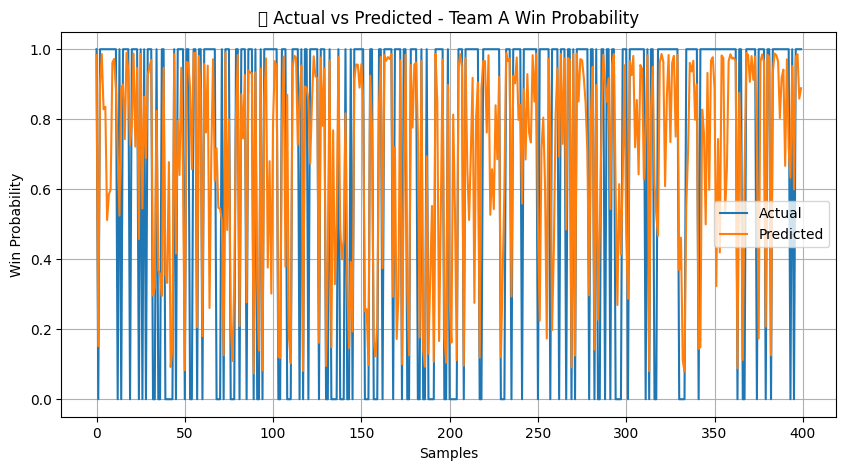

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
🔮 Prediction: Team A Win Probability = 0.95



🔮 Custom Prediction:
Input: [2.1, 1.3] ➡️ Predicted Team A Win: 0.95


In [37]:
import logging
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# -------------------- Logging Setup --------------------
logging.basicConfig(level=logging.INFO, format='%(message)s', force=True)

# -------------------- Load Data --------------------
def load_data(url: str):
    """Loads data from the given CSV URL."""
    try:
        data = pd.read_csv(url)
        logging.info('✅ Data loaded successfully!')
        return data
    except Exception as e:
        logging.error("❌ Error loading data", exc_info=True)
        return None

# -------------------- Scale Features --------------------
def process_data(df):
    """Processes and scales feature and target variables."""
    df.dropna(inplace=True)
    x = df[['team_a_avg_goals', 'team_b_avg_goals']]
    y = df['team_a_win']

    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    X_scaled = x_scaler.fit_transform(x)
    y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

    logging.info(f"📊 Scaled X shape: {X_scaled.shape}")
    logging.info(f"🎯 Scaled y shape: {y_scaled.shape}")
    return X_scaled, y_scaled, x_scaler, y_scaler

# -------------------- Build Model --------------------
def build_model(input_dim):
    """Builds and compiles a simple neural network model."""
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    logging.info("✅ Model built and compiled.")
    return model

# -------------------- Train Model --------------------
def train_model(model, X_train, y_train, X_val, y_val):
    """Trains the model using early stopping."""
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )
    logging.info("✅ Training completed.")
    return history

# -------------------- Make Predictions --------------------
def make_predictions(model, X_val, y_scaler):
    """Makes predictions and unscales the results."""
    pred_scaled = model.predict(X_val, verbose=0)
    pred_unscaled = y_scaler.inverse_transform(pred_scaled)
    return pred_unscaled

# -------------------- Custom Prediction --------------------
def predict_custom(model, input_values, x_scaler, y_scaler):
    """Predicts win probability for Team A given input features."""
    input_scaled = x_scaler.transform([input_values])
    pred_scaled = model.predict(input_scaled, verbose=0)
    pred_unscaled = y_scaler.inverse_transform(pred_scaled)[0][0]

    logging.info(f"🔮 Prediction: Team A Win Probability = {pred_unscaled:.2f}")
    print(f"\n🔮 Custom Prediction:\nInput: {input_values} ➡️ Predicted Team A Win: {pred_unscaled:.2f}")
    return pred_unscaled

# -------------------- Evaluate --------------------
def evaluate_model(y_true_scaled, y_pred_scaled, y_scaler):
    """Evaluates model performance using RMSE and R²."""
    y_true = y_scaler.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)

    logging.info(f"📊 RMSE: {rmse:.4f}")
    logging.info(f"📈 R² Score: {r2:.4f}")

    print(f"\n📊 RMSE: {rmse:.4f}")
    print(f"📈 R² Score: {r2:.4f}")

# -------------------- Plot --------------------
def plot_predictions(y_val_scaled, y_pred_unscaled, y_scaler):
    """Plots actual vs predicted values."""
    y_true = y_scaler.inverse_transform(y_val_scaled.reshape(-1, 1))

    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred_unscaled, label='Predicted')
    plt.title('📈 Actual vs Predicted - Team A Win Probability')
    plt.xlabel('Samples')
    plt.ylabel('Win Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------- Main --------------------
def main():
    url = "https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/refs/heads/main/classification_dl.csv"
    df = load_data(url)

    if df is not None:
        X_scaled, y_scaled, x_scaler, y_scaler = process_data(df)
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

        model = build_model(X_train.shape[1])
        train_model(model, X_train, y_train, X_val, y_val)

        loss, mae = model.evaluate(X_val, y_val, verbose=0)
        print(f"\n✅ Final Evaluation:\nLoss: {loss:.4f}, MAE: {mae:.4f}")

        predictions = make_predictions(model, X_val, y_scaler)
        evaluate_model(y_val, predictions, y_scaler)
        plot_predictions(y_val, predictions, y_scaler)

        # Optional: Custom Prediction
        custom_input = [2.1, 1.3]  # team_a_avg_goals, team_b_avg_goals
        predict_custom(model, custom_input, x_scaler, y_scaler)

if __name__ == "__main__":
    main()


# Multiple Classification

✅ Data loaded successfully!
📊 Scaled X shape: (2000, 8)
🎯 Scaled y shape: (2000, 1)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
✅ Model built and compiled.


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2027 - mae: 0.4319 - val_loss: 0.1348 - val_mae: 0.3401
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1138 - mae: 0.2978 - val_loss: 0.0762 - val_mae: 0.2286
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0680 - mae: 0.2073 - val_loss: 0.0505 - val_mae: 0.1648
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0447 - mae: 0.1489 - val_loss: 0.0383 - val_mae: 0.1308
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0323 - mae: 0.1130 - val_loss: 0.0313 - val_mae: 0.1081
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 - mae: 0.1003 - val_loss: 0.0281 - val_mae: 0.0954
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248 - mae: 0.0850 - val_loss: 0.0226 - val_mae: 0.0834
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mae: 0.0807 - val_loss: 0.0226 - val_mae: 0.0755
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mae: 

✅ Training completed.


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 - mae: 0.0457 

✅ Final Evaluation:
Loss: 0.0105, MAE: 0.0404
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


📊 RMSE: 0.1023
📈 R² Score: 0.9510



📊 RMSE: 0.1023
📈 R² Score: 0.9510


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


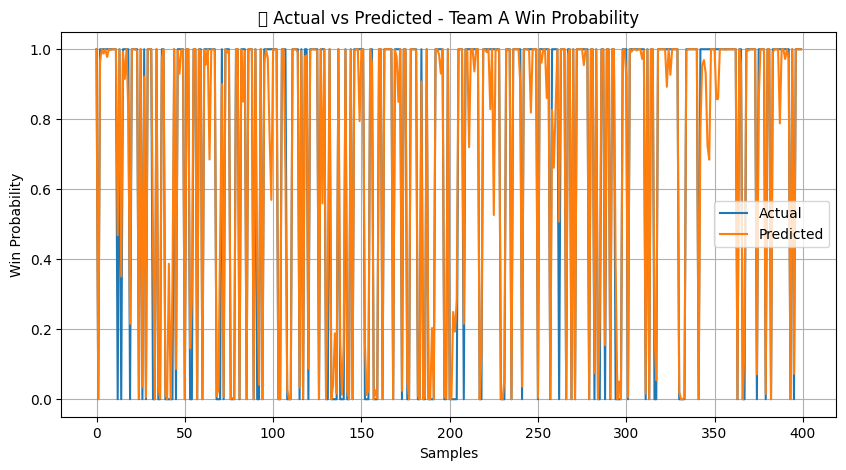

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(

🔮 Predicted Team A Win Probability: 1.00



🔮 Custom Prediction:
➡️ Predicted Team A Win Probability: 1.00


In [36]:
import logging
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# -------------------- Logging Setup --------------------
logging.basicConfig(level=logging.INFO, format='%(message)s', force=True)

# -------------------- Load Data --------------------
def load_data(url: str):
    try:
        data = pd.read_csv(url)
        logging.info('✅ Data loaded successfully!')
        return data
    except Exception as e:
        logging.error("❌ Error loading data", exc_info=True)
        return None

# -------------------- Scale Features --------------------
def process_data(df):
    df.dropna(inplace=True)
    x = df.drop(columns='team_a_win')
    y = df['team_a_win']

    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    X_scaled = x_scaler.fit_transform(x)
    y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

    logging.info(f"📊 Scaled X shape: {X_scaled.shape}")
    logging.info(f"🎯 Scaled y shape: {y_scaled.shape}")
    return X_scaled, y_scaled, x_scaler, y_scaler

# -------------------- Build Model --------------------
def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    logging.info("✅ Model built and compiled.")
    return model

# -------------------- Train Model --------------------
def train_model(model, X_train, y_train, X_val, y_val):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )
    logging.info("✅ Training completed.")
    return history

# -------------------- Make Predictions --------------------
def make_predictions(model, X_val, y_scaler):
    pred_scaled = model.predict(X_val)
    pred_unscaled = y_scaler.inverse_transform(pred_scaled)
    return pred_unscaled

# -------------------- Custom Prediction --------------------
def predict_custom(model, input_values, x_scaler, y_scaler):
    input_scaled = x_scaler.transform([input_values])
    pred_scaled = model.predict(input_scaled, verbose=0)
    pred_unscaled = y_scaler.inverse_transform(pred_scaled)[0][0]

    logging.info(f"\n🔮 Predicted Team A Win Probability: {pred_unscaled:.2f}")
    print(f"\n🔮 Custom Prediction:\n➡️ Predicted Team A Win Probability: {pred_unscaled:.2f}")

    return pred_unscaled

# -------------------- Evaluate --------------------
def evaluate_model(y_true_scaled, y_pred_scaled, y_scaler):
    y_true = y_scaler.inverse_transform(y_true_scaled.reshape(-1, 1))
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    r2 = r2_score(y_true, y_pred)

    logging.info(f"📊 RMSE: {rmse:.4f}")
    logging.info(f"📈 R² Score: {r2:.4f}")

    print(f"\n📊 RMSE: {rmse:.4f}")
    print(f"📈 R² Score: {r2:.4f}")

# -------------------- Plot --------------------
def plot_predictions(y_val_scaled, y_pred_unscaled, y_scaler):
    y_true = y_scaler.inverse_transform(y_val_scaled.reshape(-1, 1))

    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred_unscaled, label='Predicted')
    plt.title('📈 Actual vs Predicted - Team A Win Probability')
    plt.xlabel('Samples')
    plt.ylabel('Win Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------- Main --------------------
def main():
    url = "https://raw.githubusercontent.com/AqueeqAzam/data-science-and-machine-learning-datasets/refs/heads/main/classification_dl.csv"
    df = load_data(url)

    if df is not None:
        X_scaled, y_scaled, x_scaler, y_scaler = process_data(df)
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

        model = build_model(X_train.shape[1])
        train_model(model, X_train, y_train, X_val, y_val)

        loss, mae = model.evaluate(X_val, y_val)
        print(f"\n✅ Final Evaluation:\nLoss: {loss:.4f}, MAE: {mae:.4f}")

        predictions = make_predictions(model, X_val, y_scaler)
        evaluate_model(y_val, predictions, y_scaler)
        plot_predictions(y_val, predictions, y_scaler)

        # Optional: Custom Prediction
        custom_input = [2.1, 1.3, 60, 40, 1, 2, 1, 1]  # Adjust based on the actual feature order
        predict_custom(model, custom_input, x_scaler, y_scaler)

if __name__ == "__main__":
    main()


Deep Learning Algorithms

2️⃣ Convolutional Neural Networks (CNNs)
---
📌 Use Case: Use Image_Path for image classification.
📌 Best When:
✅ The dataset consists of images, videos, or visual data.
✅ The task requires object detection, image classification, or segmentation.

⚠️ Avoid When:
❌ The input data is not image-based (use FCNNs or RNNs instead).
❌ There is limited training data (CNNs require a large dataset).

🔧 Industry Applications:

Facial Recognition (Facebook, Apple, Google) → Face ID unlocking, social media tagging.
Medical Imaging (Healthcare AI) → Detecting diseases from X-rays, MRIs, CT scans.
Self-Driving Cars (Tesla, Waymo, Uber) → Object detection for autonomous navigation.
3️⃣ Recurrent Neural Networks (RNNs)
---
📌 Use Case: Use Review (text) for sentiment analysis or time series prediction.
📌 Best When:
✅ The data is sequential (e.g., text, time-series, speech data).
✅ You need memory across previous time steps (e.g., forecasting).

⚠️ Avoid When:
❌ The dataset is too large (RNNs struggle with long sequences; LSTMs work better).
❌ There are vanishing gradient problems (deep sequences require LSTMs or Transformers).

🔧 Industry Applications:

Chatbots & Voice Assistants (Google Assistant, Siri, Alexa) → Understanding natural language in conversations.
Stock Price Prediction (Finance AI) → Forecasting future stock trends.
Machine Translation (Google Translate, DeepL) → Converting text from one language to another.
4️⃣ Long Short-Term Memory Networks (LSTMs) & Gated Recurrent Units (GRUs)
---
📌 Use Case: Use Review (text) for sentiment analysis or Monthly_Sales for time-series forecasting.
📌 Best When:
✅ The dataset has long-term dependencies (e.g., long sentences, time-series with past trends).
✅ The problem requires remembering patterns from long sequences.

⚠️ Avoid When:
❌ You need real-time predictions (LSTMs are slower than Transformers).
❌ The problem doesn’t involve sequential data.

🔧 Industry Applications:

Fraud Detection (Banking, PayPal, Stripe, Amazon Payments) → Detecting fraud based on transaction history.
Financial Market Forecasting (Bloomberg, Goldman Sachs, Hedge Funds) → Stock market trends & economic forecasting.
Speech Recognition (Google Voice, Amazon Alexa, Siri) → Understanding spoken language over time.
5️⃣ Transformers (BERT, GPT, T5, ViTs)
---
📌 Use Case: Use Review (text) for advanced NLP tasks, Use Image_Path for Vision Transformers (ViT).
📌 Best When:
✅ The dataset involves text, language modeling, or NLP tasks.
✅ The task requires highly contextual understanding of language or images.

⚠️ Avoid When:
❌ The dataset is small (Transformers require large pretraining datasets).
❌ The task is simple classification (Smaller models like Naïve Bayes or Logistic Regression may be better).

🔧 Industry Applications:

ChatGPT, Google Bard, OpenAI GPT-4 → Conversational AI and text generation.
Google Search (RankBrain, BERT, MUM) → Understanding search queries for better ranking.
Code Generation (GitHub Copilot, OpenAI Codex) → AI-powered coding assistants.